In [42]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
# #Mounting GoogleDrive
# from google.colab import drive
# drive.mount('/content/drive/')

In [44]:
#Reading the file
# df = pd.read_csv("/content/drive/MyDrive/Datasets/delivery_time.csv")
df = pd.read_csv("delivery_time.csv")

In [45]:
#Making a copy of the Dataframe
df1 = df.copy()

In [46]:
#Peeking at the top 5 entries of the dataframe
df1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [47]:
#Information regarding the Data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


**Exploratory Data Analysis(EDA)**

In [48]:
#Descriptive Statistics of the Data
df1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [49]:
#Shape of the Data
df1.shape

(21, 2)

In [50]:
#Checking for Duplicates
df1.duplicated().sum()

0

In [51]:
#Checking for NA values
df1.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [52]:
df1.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [53]:
#Renaming the Columns for our convenience
df1.rename(columns={"Delivery Time":"delivery_time","Sorting Time":"sorting_time"}, inplace = True)

**Visualizations**

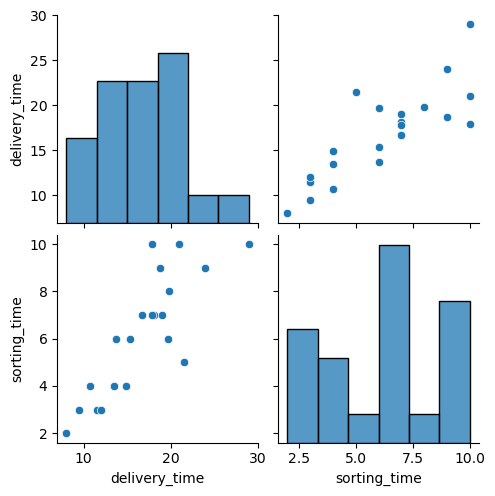

In [54]:
sns.pairplot(df1)

array([[<Axes: title={'center': 'delivery_time'}>,
        <Axes: title={'center': 'sorting_time'}>]], dtype=object)

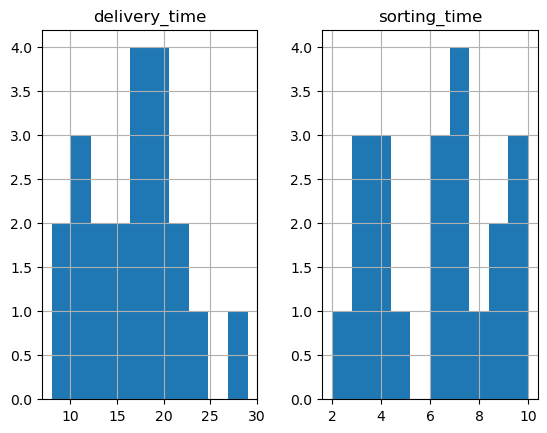

In [55]:
#Creating a histogram
df1.hist()

([<matplotlib.axis.XTick at 0x1e7f3729150>], [Text(1, 0, 'Delivery Time')])

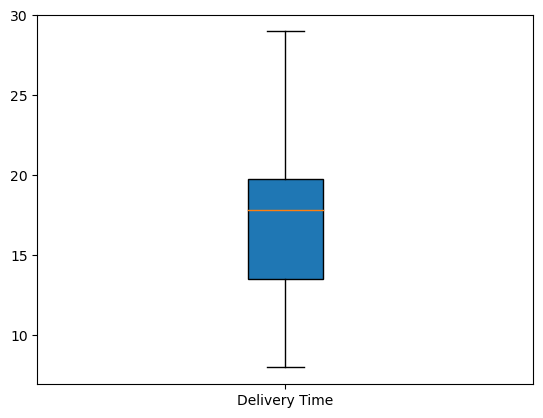

In [56]:
#Creating a Boxplot
plt.boxplot(df1["delivery_time"], patch_artist= True)
plt.xticks([1],["Delivery Time"])

([<matplotlib.axis.XTick at 0x1e7f3863210>], [Text(1, 0, 'Sorting Time')])

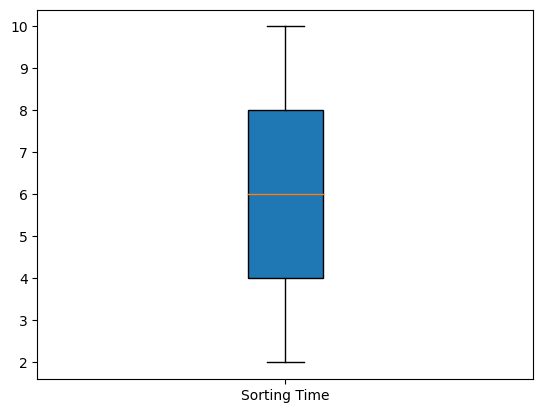

In [57]:
plt.boxplot(df1["sorting_time"], patch_artist= True)
plt.xticks([1],["Sorting Time"])

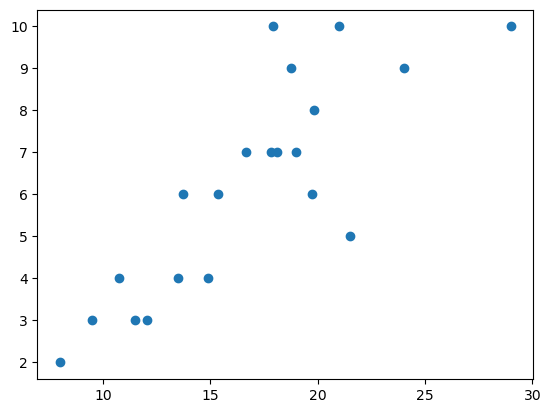

In [58]:
#Scatter plot
plt.scatter(df1["delivery_time"],df1["sorting_time"])

<Axes: >

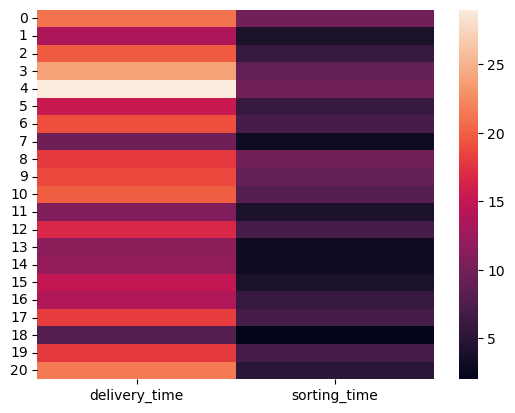

In [59]:
sns.heatmap(df1)

In [60]:
#Correlation
df1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


**Data partition Using train_test_split()**

In [61]:
X = df1[["sorting_time"]]
y = df1[["delivery_time"]]

In [62]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=17)

In [63]:
print("X_train shape: " ,X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: " ,y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (16, 1)
X_test shape:  (5, 1)
y_train shape:  (16, 1)
y_test shape:  (5, 1)


**Standard Scaler**

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Fitting the Model Using Statsmodels Method**

In [66]:
import statsmodels.api as sm

In [67]:
model1 = sm.OLS(y_train , X_train_scaled).fit()

In [68]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.049
Model:                            OLS   Adj. R-squared (uncentered):             -0.014
Method:                 Least Squares   F-statistic:                             0.7745
Date:                Wed, 27 Dec 2023   Prob (F-statistic):                       0.393
Time:                        13:42:19   Log-Likelihood:                         -68.210
No. Observations:                  16   AIC:                                      138.4
Df Residuals:                      15   BIC:                                      139.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.9055      4.438      0.880      0.393      -5.553      13.364
==============================================================================
Omnibus:                        3.334   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                1.930
Skew:                           0.851   Prob(JB):                        0.381
Kurtosis:                       3.046   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Fitting the model Using Scikit-Learn Method**

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
linear = LinearRegression()

In [71]:
model2 = linear.fit(X,y)

In [72]:
df1['Y_pred'] = model2.predict(X)
df1['Y_pred']

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
Name: Y_pred, dtype: float64

In [73]:
print("Coefficient of the model:" , model2.coef_ )
print("Intercept of the model: " , model2.intercept_)

Coefficient of the model: [[1.6490199]]
Intercept of the model:  [6.58273397]


In [74]:
df1.columns

Index(['delivery_time', 'sorting_time', 'Y_pred'], dtype='object')

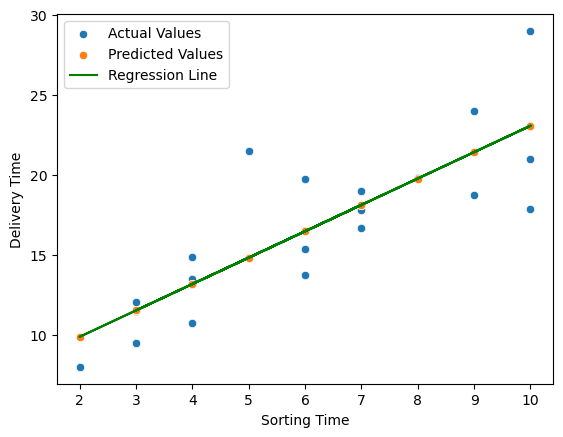

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf


# Plotting actual vs. predicted values
sns.scatterplot(x='sorting_time', y='delivery_time', data=df1, label="Actual Values")
sns.scatterplot(x='sorting_time', y='Y_pred', data=df1, label="Predicted Values")

# Plot the regression line
plt.plot(df1['sorting_time'],df1["Y_pred"], color='green', label='Regression Line')

plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend()
plt.show()


In [76]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(df1['delivery_time'], df1['Y_pred'])
print("Mean Squared Error:", mse)


Mean Squared Error: 7.793311548584063


In [77]:
# Assuming you've trained your model and made predictions
# Make predictions using the model
df['Y_pred'] = model1.predict(df1["sorting_time"].values.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df1['delivery_time'], df1['Y_pred']))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 2.79
